Assignment 2
by: Simon Tremblay, 8213373

Submitted to Dr. Runsewe as part of the course IAI5101: ML for Scientists and Engineers

Univ. of Ottawa
2022-03-22

# Introduction

This code leverages the use of deep learning neural networks to attempt to predict if someone is suffering from heart disease or not from the following features:

1. Age
2. Sex
3. If they've or are suffering from chest pains
4. Resting blood pressure
5. Cholesterol
6. Fasting blood sugars
7. Resting ECG evaluation
8. Max heart rate
9. Exercise angina
10. Oldpeak value
11. ST slope

## Data loading

We first import all required libraries and load the data into a Pandas DataFrame

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data_raw = pd.read_csv("./heart.csv")
data_raw

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


## EDA

### Univariate Analysis

In [20]:
# Make a function to plot a histogram that has the desired format
def makeHist(data, title, xlabel, ylabel='Frequency'):
    fig, histo = plt.subplots(1, 1, figsize=(7,5), dpi=100)

    vals, bins, edges = histo.hist(data, rwidth=0.9)
    histo.set_xticks(bins)
    histo.set_title(title)
    histo.set_xlabel(xlabel)
    histo.set_ylabel(ylabel)

    rects = histo.patches
    labels = vals.astype(int)

    for rect, label in zip(rects, labels):
        height = rect.get_height()
        histo.text(rect.get_x() + rect.get_width() / 2, height+0.01, label,
                ha='center', va='bottom')

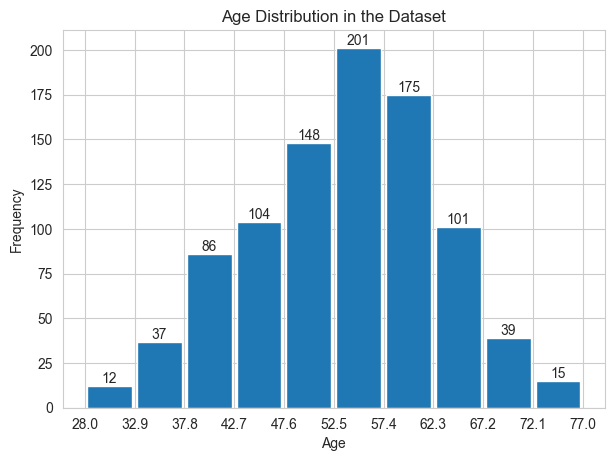

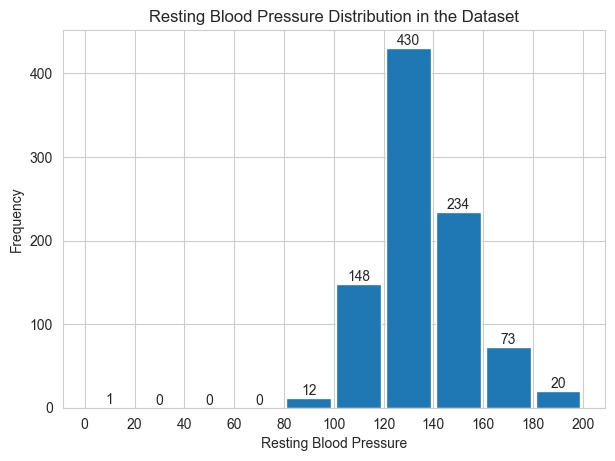

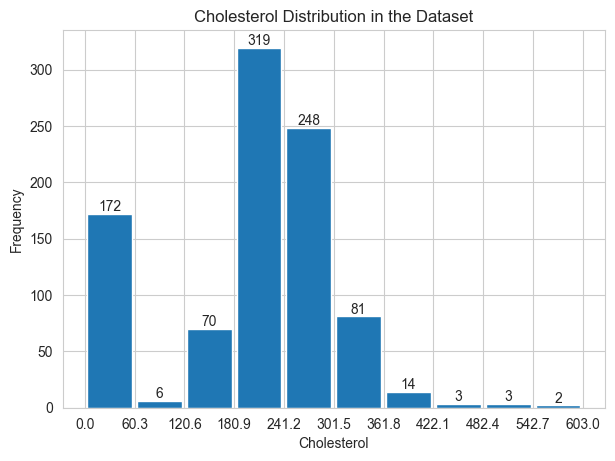

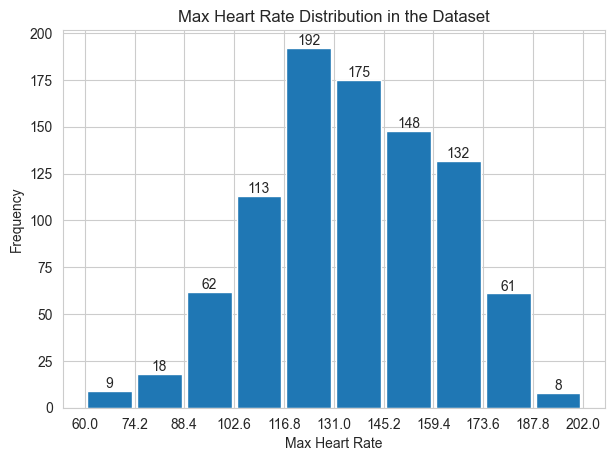

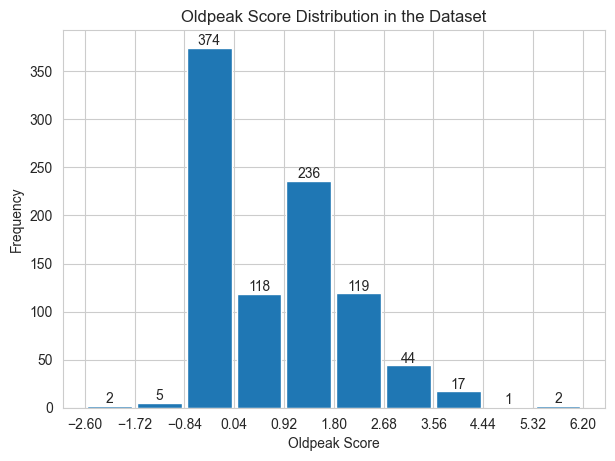

In [21]:
# Plot our histograms
makeHist(data_raw['Age'], 'Age Distribution in the Dataset', 'Age', 'Frequency')
makeHist(data_raw['RestingBP'], 'Resting Blood Pressure Distribution in the Dataset', 'Resting Blood Pressure', 'Frequency')
makeHist(data_raw['Cholesterol'], 'Cholesterol Distribution in the Dataset', 'Cholesterol', 'Frequency')
makeHist(data_raw['MaxHR'], 'Max Heart Rate Distribution in the Dataset', 'Max Heart Rate', 'Frequency')
makeHist(data_raw['Oldpeak'], 'Oldpeak Score Distribution in the Dataset', 'Oldpeak Score', 'Frequency')

### Bivariate Analysis

#### Age Distribution vs. Label

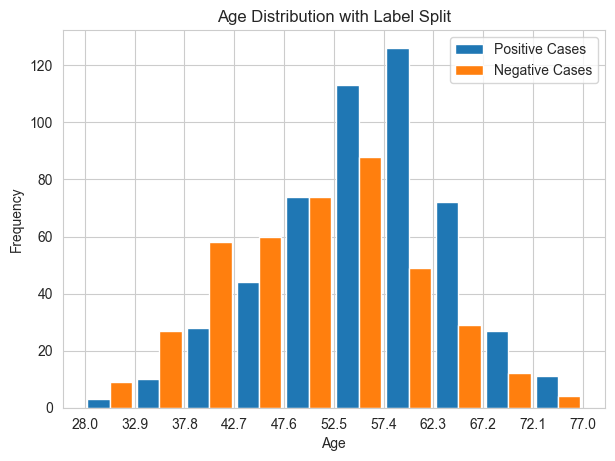

In [22]:
positCasesAge = data_raw['Age'][data_raw[data_raw['HeartDisease'] == 1].index]
negaCasesAge = data_raw['Age'][data_raw[data_raw['HeartDisease'] == 0].index]
biVarData = [positCasesAge, negaCasesAge]

fig, histo = plt.subplots(1, 1, figsize=(7,5), dpi=100)

vals, bins, edges = histo.hist(biVarData, rwidth=0.9, stacked=False)
histo.set_xticks(bins)
histo.set_title('Age Distribution with Label Split')
histo.set_xlabel('Age')
histo.set_ylabel('Frequency')
histo.legend(['Positive Cases','Negative Cases'])

The percentiles (1, 25, 50, 75 and 99th) for Age are as follows:
[32. 47. 54. 60. 74.], respectively.
The interquartile range (IQr) is: 13.0, the maximum (Q3 + 1.5IQr) is 79.5


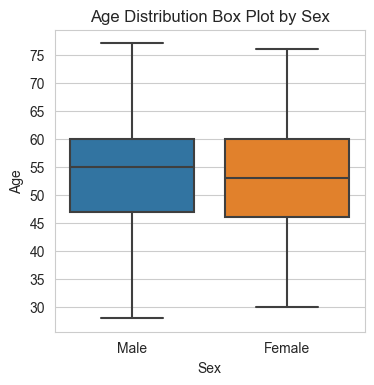

In [23]:
ageDistMale = data_raw['Age'][data_raw[data_raw['Sex'] == 'M'].index]
ageDistFemale = data_raw['Age'][data_raw[data_raw['Sex'] == 'F'].index]

plt.figure(figsize=(4,4), dpi=100)
plt.title('Age Distribution Box Plot by Sex')
sns.set_style(style='whitegrid')

print('The percentiles (1, 25, 50, 75 and 99th) for Age are as follows:')
print(str(np.percentile(data_raw['Age'], [1,25,50,75,99])) + ", respectively.")
IQr = np.percentile(data_raw['Age'], 75) - np.percentile(data_raw['Age'], 25)
cutoff = np.percentile(data_raw['Age'], 75) + 1.5*IQr
print("The interquartile range (IQr) is: " + str(IQr) + ", the maximum (Q3 + 1.5IQr) is " + str(cutoff))
ax = sns.boxplot(data=[ageDistMale, ageDistFemale])
ax.set_xlabel('Sex')
ax.set_ylabel('Age')
ax.set_yticks(range(int(10*np.round(min(data_raw['Age'])/10)), int(10*np.ceil(max(data_raw['Age'])/10)), 5))
ax.set_xticklabels(['Male','Female'])
plt.show()

### Multivariate Analysis

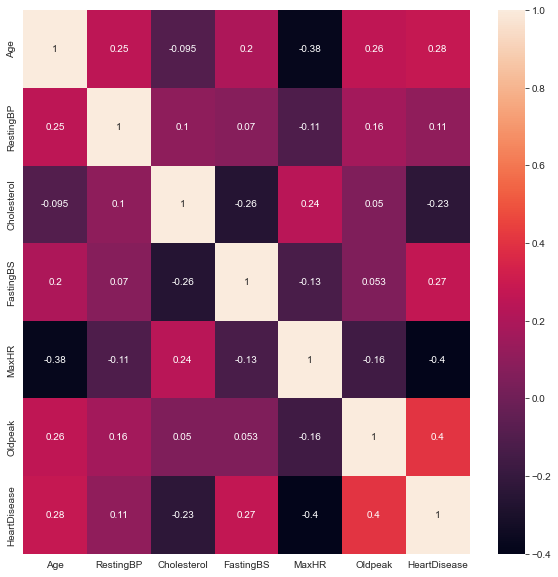

In [24]:
# Generate and plot the correlation matrix
fig, htmp = plt.subplots(figsize=(10,10))

corrMatrix = data_raw.corr()
sns.heatmap(corrMatrix, annot=True, ax=htmp)
plt.show()

## Feature Engineering

### Outlier Detection

C:\Users\User\AppData\Local\Temp\ipykernel_24312\1465353826.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Cholesterol'][zeroCholIndices] = artificialChol



The percentiles (1, 25, 50, 75 and 99th) for Age are as follows:
[32. 47. 54. 60. 74.], respectively.
The interquartile range (IQr) is: 13.0
The maximum (Q3 + 1.5IQr) is 79.5
The minimum (Q1 - 1.5IQr) is 27.5
No outliers found!

The percentiles (1, 25, 50, 75 and 99th) for RestingBP are as follows:
[ 95. 120. 130. 140. 180.], respectively.
The interquartile range (IQr) is: 20.0
The maximum (Q3 + 1.5IQr) is 170.0
The minimum (Q1 - 1.5IQr) is 90.0
Dropping RestingBP outliers. Found 28

The percentiles (1, 25, 50, 75 and 99th) for Cholesterol are as follows:
[125.28       207.         238.         275.         421.20323629], respectively.
The interquartile range (IQr) is: 68.0
The maximum (Q3 + 1.5IQr) is 377.0
The minimum (Q1 - 1.5IQr) is 105.0
Dropping Cholesterol outliers. Found 26

The percentiles (1, 25, 50, 75 and 99th) for MaxHR are as follows:
[ 81. 120. 138. 156. 186.], respectively.
The interquartile range (IQr) is: 36.0
The maximum (Q3 + 1.5IQr) is 210.0
The minimum (Q1 - 1.5I

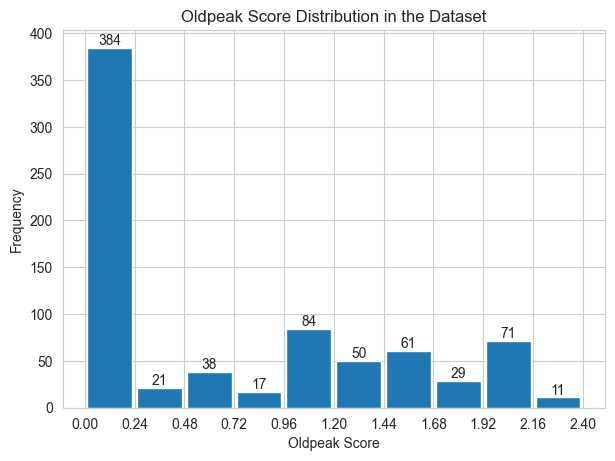

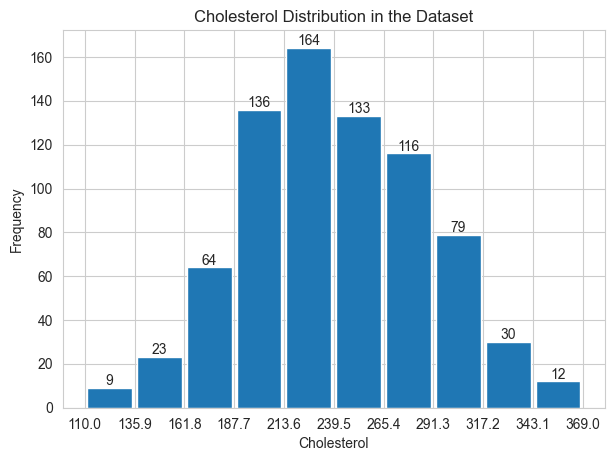

In [25]:
# drop duplicates and Nan
data = pd.DataFrame.copy((data_raw.drop_duplicates()).dropna())

# drop those datapoints with negative oldpeak
data.drop(data[data['Oldpeak'] < 0].index, inplace=True)

# generate and assign normally distributed cholesterol values for the 0 cholesterol rows
zeroCholIndices = data[data['Cholesterol'] <= 0].index
cholNonZero = data.drop(zeroCholIndices)['Cholesterol']
artificialChol = np.random.normal(loc=np.mean(cholNonZero), scale=np.std(cholNonZero), size=len(zeroCholIndices))
data['Cholesterol'][zeroCholIndices] = artificialChol

# Print statistical data and remove outliers at set interquartile range factor
def removeOutliersNormal(data, feature, cutoff_IQr=1.5):
    print()
    print('The percentiles (1, 25, 50, 75 and 99th) for ' + feature + ' are as follows:')
    print(str(np.percentile(data[feature], [1,25,50,75,99])) + ', respectively.')
    IQr = np.percentile(data[feature], 75) - np.percentile(data[feature], 25)
    cutoff_high = np.percentile(data[feature], 75) + cutoff_IQr*IQr
    cutoff_low = np.percentile(data[feature], 25) - cutoff_IQr*IQr
    print('The interquartile range (IQr) is: ' + str(IQr))
    print('The maximum (Q3 + ' + str(cutoff_IQr) + 'IQr) is ' + str(cutoff_high))
    print('The minimum (Q1 - ' + str(cutoff_IQr) + 'IQr) is ' + str(cutoff_low))
    cutoff_indices_low = data[data[feature] < cutoff_low].index
    cutoff_indices_high = data[data[feature] > cutoff_high].index
    cutoff_indices = np.concatenate([cutoff_indices_low, cutoff_indices_high])
    if len(cutoff_indices) != 0:
        print('Dropping ' + feature + ' outliers. Found ' + str(len(cutoff_indices)))
        return data.drop(cutoff_indices)
    print('No outliers found!')
    return data

# Drop rows with outliers in any of their columns (normally distributed)
data_numeric_normal = ['Age','RestingBP','Cholesterol','MaxHR']
for feature in data_numeric_normal: data = removeOutliersNormal(data, feature, 1.50)

# Create symmetric Oldpeak dataset to obtain the cutoff bound of it assuming it is right tailed
# then drop the values higher than the cutoff
oldpeak_symmetric = pd.concat([-1.0*data.Oldpeak, data.Oldpeak])
IQr = np.percentile(oldpeak_symmetric, 75) - np.percentile(oldpeak_symmetric, 25)
cutoff = np.percentile(oldpeak_symmetric, 75) + 1.5*IQr
cut_indices = data[data['Oldpeak'] > cutoff].index
print()
print('Checking the Oldpeak scores gave an outlier cutoff value of ' + str(cutoff))
print(str(len(cut_indices)) + ' values will be dropped.')
data = data.drop(cut_indices)

# Display the new histograms
makeHist(data['Oldpeak'], 'Oldpeak Score Distribution in the Dataset', 'Oldpeak Score', 'Frequency')
makeHist(data['Cholesterol'], 'Cholesterol Distribution in the Dataset', 'Cholesterol', 'Frequency')

### Class Imbalance

Text(0, 0.5, 'Frequency')

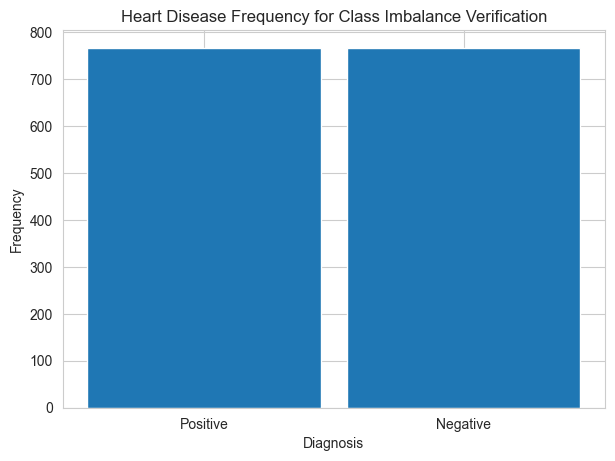

In [26]:
# Check if there is a class imbalance on the label
fig, barplot = plt.subplots(1, 1, figsize=(7,5), dpi=100)

barplot.bar(['Positive','Negative'], [len(data['HeartDisease'] == 1), len(data['HeartDisease'] == 0)], width=0.9)
barplot.set_title('Heart Disease Frequency for Class Imbalance Verification')
barplot.set_xlabel('Diagnosis')
barplot.set_ylabel('Frequency')

No class imbalance can be perceived. Data can be scaled.

### Scaling and Encoding 

In [27]:
data_encoded = data.copy()
data_encoded.reset_index()

# Function to z-nomalize the data
def minMaxNormalize(data, feature): return (data[feature] - min(data[feature]))/(max(data[feature]) - min(data[feature]))

# z-Normalize the numerical data
data_encoded['Age'] = minMaxNormalize(data, 'Age')
data_encoded['RestingBP'] = minMaxNormalize(data, 'RestingBP')
data_encoded['Cholesterol'] = minMaxNormalize(data, 'Cholesterol')
data_encoded['MaxHR'] = minMaxNormalize(data, 'MaxHR')
data_encoded['Oldpeak'] = minMaxNormalize(data, 'Oldpeak')

# Changing sex to female (sorting values ensures F is factorized first)
data_encoded['Sex'] = pd.factorize(data_encoded['Sex'].sort_values())[0]
data_encoded.columns = ['Male' if x == 'Sex' else x for x in data_encoded.columns]

# Same for ExerciseAngina
data_encoded['ExerciseAngina'] = pd.factorize(data_encoded['ExerciseAngina'].sort_values())[0]

# Use One Hot Encoding for the other features
from keras.utils import np_utils

toOHE = ['ChestPainType','RestingECG','ST_Slope']

def OHE(arr):
    unique, ids = np.unique(arr, return_inverse=True)
    return np_utils.to_categorical(ids, len(unique))

for feature in toOHE:
    data_encoded[feature] = OHE(data_encoded[feature])

data_encoded

,Age,Male,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,0.244898,0,0.0,0.605263,0.691120,0,0.0,0.777778,0,0.000000,0.0,0
1,0.428571,0,0.0,0.868421,0.270270,0,0.0,0.659259,0,0.416667,0.0,1
2,0.183673,0,0.0,0.473684,0.667954,0,0.0,0.229630,0,0.000000,0.0,0
3,0.408163,0,1.0,0.578947,0.401544,0,0.0,0.303704,0,0.625000,0.0,1
4,0.530612,0,0.0,0.736842,0.328185,0,0.0,0.407407,0,0.000000,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
912,0.591837,1,1.0,0.605263,0.505792,0,0.0,0.414815,1,0.083333,0.0,1
913,0.346939,1,0.0,0.210526,0.594595,0,0.0,0.481481,1,0.500000,0.0,1
915,0.591837,1,1.0,0.473684,0.081081,0,0.0,0.355556,1,0.500000,0.0,1
916,0.591837,1,0.0,0.473684,0.486486,0,1.0,0.792593,1,0.000000,0.0,1


## Model Development I - Ensemble Learning

This code was modified from _Mastering Machine Learning with Python in Six Steps_

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost.sklearn import XGBClassifier

from mlxtend.classifier import EnsembleVoteClassifier
from sklearn import model_selection
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [46]:
# get the locations
X = data_encoded.iloc[ : , :-1]
y = data_encoded.iloc[ : , -1]

# evaluate the model by splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2017)
kfold = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)
num_trees = 10

KNC = KNeighborsClassifier(n_neighbors=5)
DTC = DecisionTreeClassifier(criterion='gini', splitter='best')
SVM = SVC(kernel='rbf', random_state=0, probability=True)
XGB = XGBClassifier(n_estimators=50, objective='binary:logistic', seed=2017, use_label_encoder=False, eval_metric='auc')

clfs = []
print('5-fold cross validation:\n')
for clf, label in zip([KNC, DTC, SVM, XGB],
                      ['KNeighbors',
                       'Decision Tree',
                       'Support Vector Machine',
                       'XG Boost']):
    scores = model_selection.cross_val_score(clf, X_train, y_train, cv=5, scoring='accuracy') 
    print("Train CV Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

md = clf.fit(X, y)
clfs.append(md)
print("Test Accuracy: %0.2f " % (metrics.accuracy_score(clf.predict (X_test), y_test)))

### Ensemble Voting
clfs = []
print('5-fold cross validation:\n')
ECS = EnsembleVoteClassifier(clfs=[KNC, DTC, XGB], voting='soft', weights=[1,1,1])
for clf, label in zip([ECS], ['Ensemble Soft Voting']):
    scores = model_selection.cross_val_score(clf, X_train, y_train, cv=5, scoring='accuracy')
print("Train CV Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))
md = clf.fit(X, y)
clfs.append(md)
print("Test Accuracy: %0.2f " % (metrics.accuracy_score(clf.predict(X_test), y_test)))

5-fold cross validation:

Train CV Accuracy: 0.78 (+/- 0.01) [KNeighbors]
Train CV Accuracy: 0.71 (+/- 0.04) [Decision Tree]
Train CV Accuracy: 0.79 (+/- 0.03) [Support Vector Machine]


C:\Python310\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Python310\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Python310\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Python310\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate 

Train CV Accuracy: 0.79 (+/- 0.03) [XG Boost]
Test Accuracy: 1.00 
5-fold cross validation:



C:\Python310\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Python310\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Python310\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Python310\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate 

Train CV Accuracy: 0.77 (+/- 0.04) [Ensemble Soft Voting]
Test Accuracy: 1.00 


C:\Python310\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Python310\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


## Model Development II - Deep Learning

In [30]:
# A few imports
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras import backend as K

In [31]:
def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

activation_funcs = ['softplus','relu','exponential']
dropouts = [0.1, 0.3, 0.5]

In [32]:
models = []
for activator in activation_funcs:
    for dropratio in dropouts:
        models.append(Sequential())
        models[-1].add(Dense(3, activation=activator))
        models[-1].add(Dropout(0.2))
        models[-1].add(Dense(3, activation=activator))
        models[-1].add(Dropout(dropratio))
        models[-1].add(Dense(3, activation=activator))
        models[-1].add(Dropout(dropratio))
        models[-1].compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc', f1_m, precision_m, recall_m])
        history = models[-1].fit(X_train, y_train, validation_data=(X_test, y_test), epochs=300, verbose=0)
        loss, accuracy, f1_score, precision, recall = models[-1].evaluate(X_train, y_train, verbose=0)
        print(activator + ' @ ' + str(dropratio) + ' on internal layers: Train - Loss: %.3f, accuracy: %.3f, f1_score: %.3f, precision: %.3f, recall: %.3f' % (loss, accuracy, f1_score, precision, recall))

softplus @ 0.1 on internal layers: Train - Loss: 0.453, accuracy: 0.302, f1_score: 1.194, precision: 0.808, recall: 2.322
softplus @ 0.3 on internal layers: Train - Loss: 0.607, accuracy: 0.104, f1_score: 0.303, precision: 0.868, recall: 0.192
softplus @ 0.5 on internal layers: Train - Loss: 2.833, accuracy: 0.493, f1_score: 0.652, precision: 0.493, recall: 1.000
relu @ 0.1 on internal layers: Train - Loss: 0.484, accuracy: 0.545, f1_score: 1.196, precision: 0.861, recall: 2.003
relu @ 0.3 on internal layers: Train - Loss: 0.699, accuracy: 0.386, f1_score: 0.234, precision: 0.659, recall: 0.157
relu @ 0.5 on internal layers: Train - Loss: 3.077, accuracy: 0.000, f1_score: 0.000, precision: 0.000, recall: 0.000
exponential @ 0.1 on internal layers: Train - Loss: 2.957, accuracy: 0.493, f1_score: 0.963, precision: 0.623, recall: 2.169
exponential @ 0.3 on internal layers: Train - Loss: 0.599, accuracy: 0.198, f1_score: 0.982, precision: 0.907, recall: 1.103
exponential @ 0.5 on internal 

Softplus and ReLu activations seems to yield the best results at lower dropout rates. The results for softplus is interesting in that it has a higher f1 score at higher dropout after reaching what seems to be a minimum at 0.3 drop rate for its internal layers. While the exponential activation function is not to best, it should be given credit for having very good f1 scores at 0.1 and 0.3 dropout rates.

## Model Comparison, Evaluation

In [50]:
from sklearn.metrics import classification_report

# Create a report for the ensemble learning
y_pred = md.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       108
           1       1.00      1.00      1.00       122

    accuracy                           1.00       230
   macro avg       1.00      1.00      1.00       230
weighted avg       1.00      1.00      1.00       230



C:\Python310\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


## Conclusion

The ensemble learning model seems to be extremely good at determining if a patient is suffering from heart disease as opposed to the trained deep neural network, on all criteria. However, this model on paper seems perfect, which raises an important flag as no model can be perfect (it might however be very useful!).